In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras import models
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
# from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
# import keras
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import cv2

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/icml_face_data.csv')
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
data[' Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name:  Usage, dtype: int64

In [4]:
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [5]:
emotions={0:'Angry' , 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise',6: 'Neutral'}

In [6]:
def data_preparation(data):
    image = []
    label_temp = data['emotion'].values.tolist()
    label = []
    for l in label_temp:
        label.append(l)
        label.append(l)
    
    for idx, item in data.iterrows(): 
        pixel = [int(p) for p in item[' pixels'].split(' ')]
        temp = np.array(np.array(pixel).reshape(48,48))
        temp_reversed = np.flipud(np.array(np.flipud(np.array(pixel)).reshape(48,48)))
        image.append(temp)
        image.append(temp_reversed)
    return np.array(image), label

In [7]:
X_train, y_train = data_preparation(data[data[' Usage']=='Training'])
X_val, y_val = data_preparation(data[data[' Usage']=='PrivateTest'])
X_test, y_test = data_preparation(data[data[' Usage']=='PublicTest'])

In [8]:
train_images = X_train.reshape(X_train.shape[0], 48, 48, 1)
train_images = train_images.astype('float32')/255
val_images = X_val.reshape(X_val.shape[0], 48, 48, 1)
val_images = val_images.astype('float32')/255
test_images = X_test.reshape(X_test.shape[0], 48, 48, 1)
test_images = test_images.astype('float32')/255

In [9]:
train_labels = to_categorical(y_train)
val_labels = to_categorical(y_val)
test_labels = to_categorical(y_test)

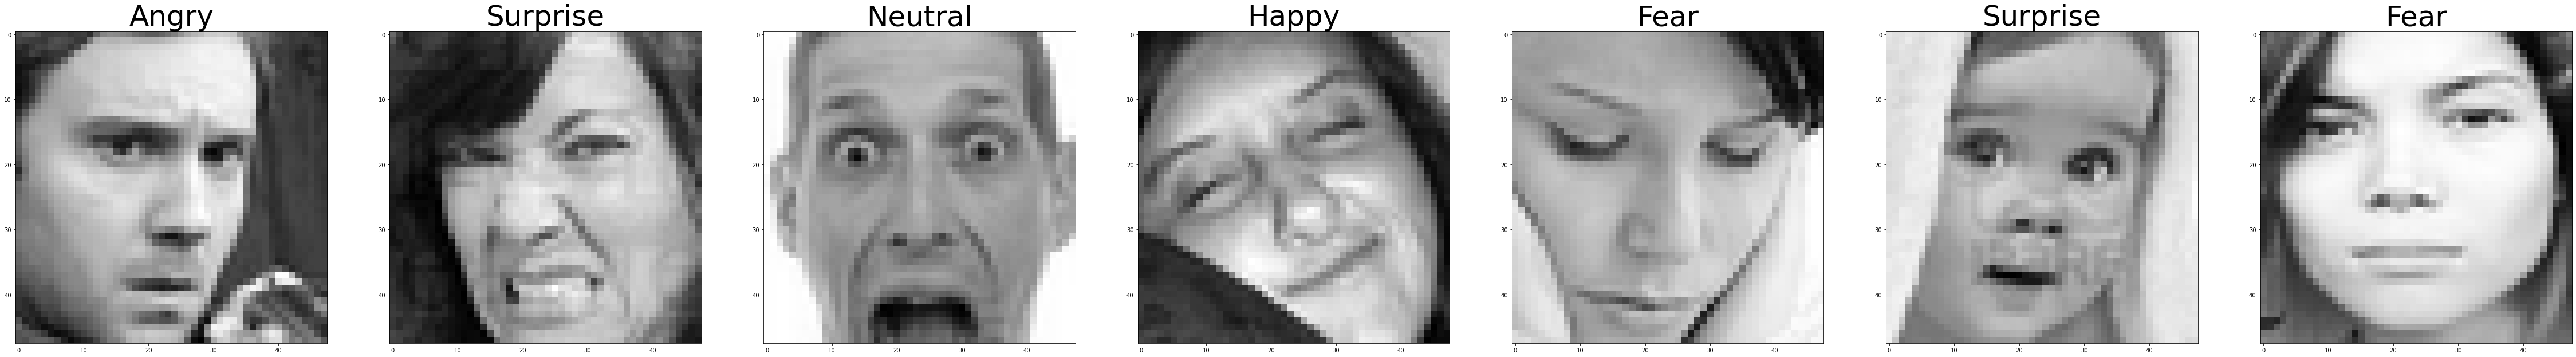

In [10]:
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(80, 16))
#     fig.subplots_adjust(hspace = .2, wspace=.2)
#     axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx*2][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()], fontsize=50)
plot_all_emotions()

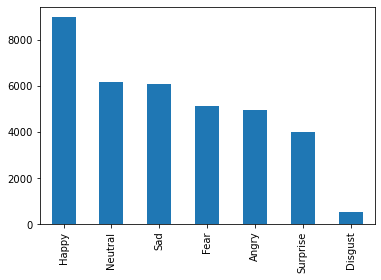

In [11]:
emotion_data = data['emotion'].map(emotions)
emotion_data.value_counts().plot(kind='bar')

In [32]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(48,48,1)))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(emotions), activation='softmax'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)       

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_model = model.fit(train_images, train_labels,
                        validation_data=(val_images, val_labels),
                        epochs=100,
                        batch_size=512)

Train on 57418 samples, validate on 7178 samples
Epoch 1/50
57418/57418 [==============================] - 26s 453us/sample - loss: 1.9548 - accuracy: 0.2271 - val_loss: 2.0136 - val_accuracy: 0.1755
Epoch 2/50
57418/57418 [==============================] - 23s 402us/sample - loss: 1.7585 - accuracy: 0.2931 - val_loss: 2.0196 - val_accuracy: 0.1744
Epoch 3/50
57418/57418 [==============================] - 23s 402us/sample - loss: 1.6392 - accuracy: 0.3560 - val_loss: 1.9224 - val_accuracy: 0.2452
Epoch 4/50
57418/57418 [==============================] - 23s 404us/sample - loss: 1.5521 - accuracy: 0.3956 - val_loss: 1.6928 - val_accuracy: 0.3286
Epoch 5/50
57418/57418 [==============================] - 23s 402us/sample - loss: 1.4860 - accuracy: 0.4240 - val_loss: 1.9076 - val_accuracy: 0.3631
Epoch 6/50
57418/57418 [==============================] - 23s 406us/sample - loss: 1.4245 - accuracy: 0.4482 - val_loss: 1.4070 - val_accuracy: 0.4539
Epoch 7/50
57418/57418 [=====================

In [29]:
model.save("model/") 
# tf.keras.models.save_model(model, os.path.join('data/model/', "1"))

INFO:tensorflow:Assets written to: model/assets


In [30]:
model = tf.keras.models.load_model('model/')

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)

7178/7178 [==============================] - 2s 267us/sample - loss: 1.0023 - accuracy: 0.6163
test caccuracy: 0.61632764


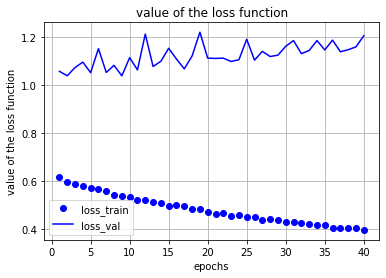

In [19]:
loss = train_model.history['loss']
loss_val = train_model.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()

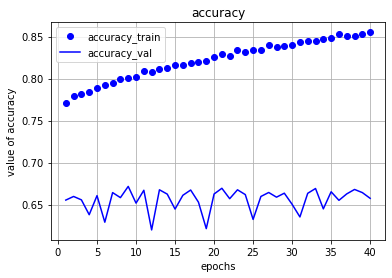

In [20]:
acc = train_model.history['accuracy']
acc_val = train_model.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

In [36]:
pred_test_labels = model.predict(test_images)

C:\Users\xlott\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


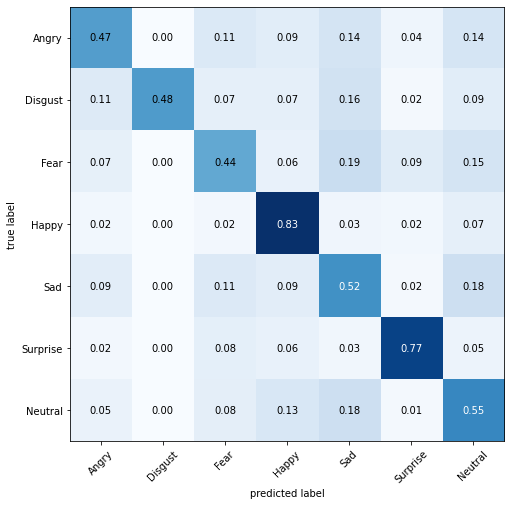

In [37]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()